In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%matplotlib inline

In [7]:
models_dir = 'data_birth/'

In [8]:
model = model_from_file(models_dir + 'model.csv')

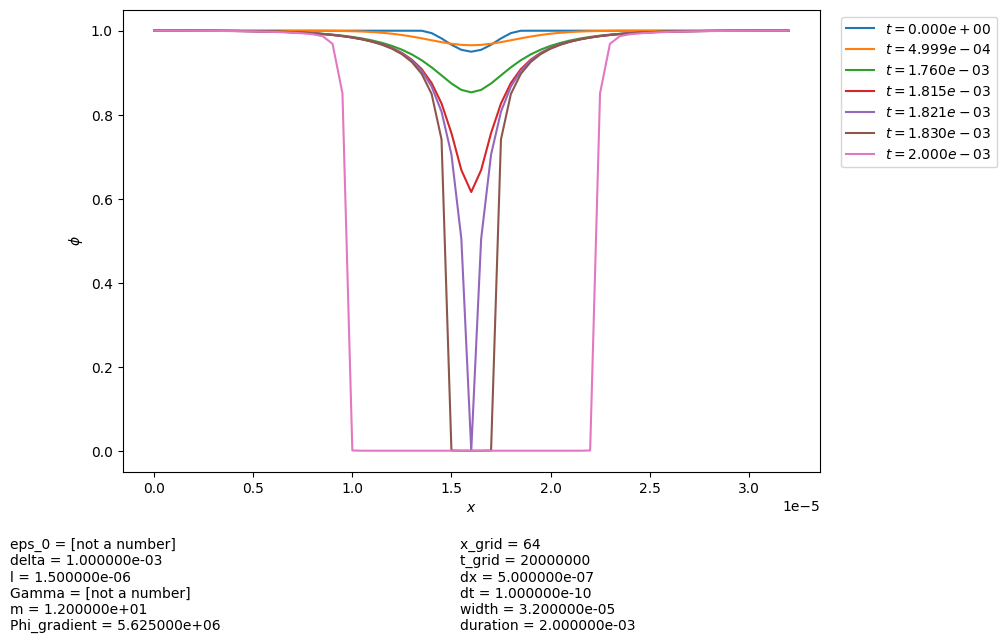

In [9]:
ts = [0, 5e-4, 1.76e-3, 1.815e-3, 1.821e-3, 1.83e-3, 2e-3]
model_plot(model, ts, figsize=(9, 6))

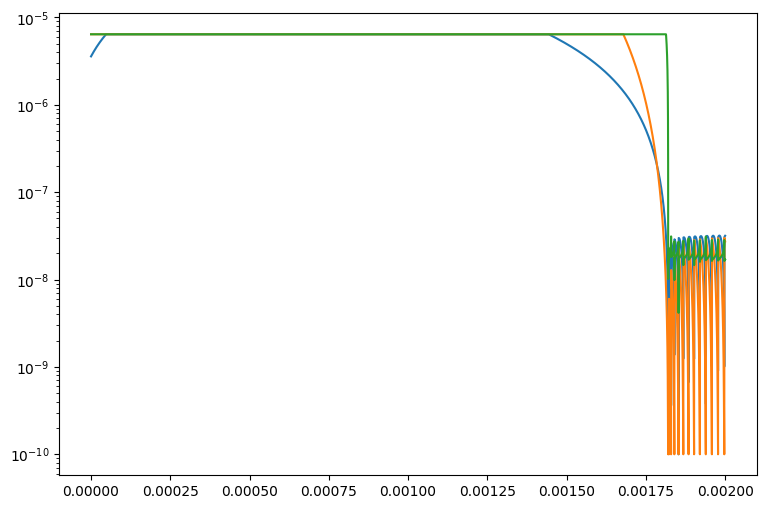

In [10]:
plt.figure(figsize=(9, 6))
plt.yscale('log')
plt.plot(model.ts, model._dt_adaptive_phi)
plt.plot(model.ts[1:], model._dt_adaptive_energy[1:])
plt.plot(model.ts, model._dt_adaptive_stability)
plt.show()

In [11]:
model_ad_phi = model_from_file(models_dir + 'model_ad_phi.csv')

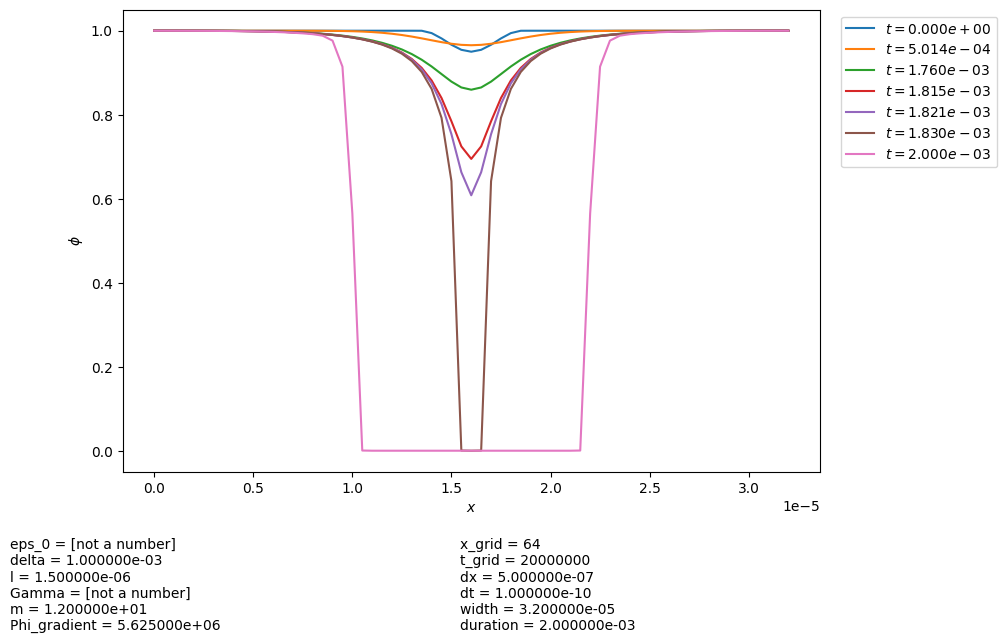

In [12]:
model_plot(model_ad_phi, ts, figsize=(9, 6))

In [13]:
model_ad_energy = model_from_file(models_dir + 'model_ad_energy.csv')

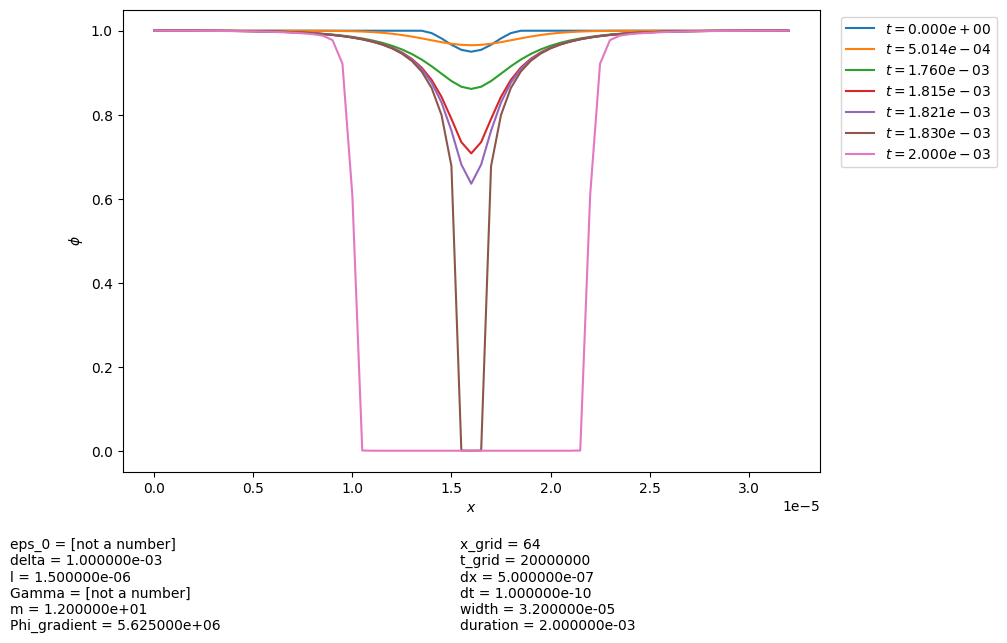

In [14]:
model_plot(model_ad_energy, ts, figsize=(9, 6))

In [15]:
model_ad_stability = model_from_file(models_dir + 'model_ad_stability.csv')

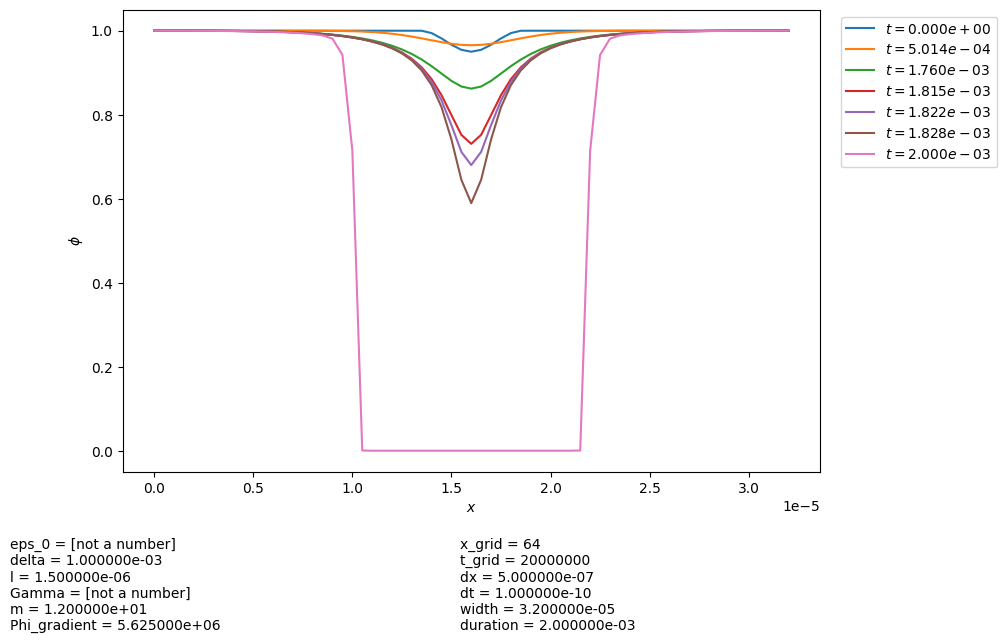

In [16]:
model_plot(model_ad_stability, ts, figsize=(9, 6))

In [17]:
def boost(model_adaptive):
    print('Шагов было:', model._t_iterations.sum())
    print('Шагов стало:', model_adaptive._t_iterations.sum() - 1)
    print('Ускорение ~', model._t_iterations.sum() / (model_adaptive._t_iterations.sum() - 1))

In [18]:
boost(model_ad_phi)

Шагов было: 19998721
Шагов стало: 24992
Ускорение ~ 800.2049055697823


In [19]:
boost(model_ad_energy)

Шагов было: 19998721
Шагов стало: 186909
Ускорение ~ 106.99710019314212


In [20]:
boost(model_ad_stability)

Шагов было: 19998721
Шагов стало: 13565
Ускорение ~ 1474.288315517877


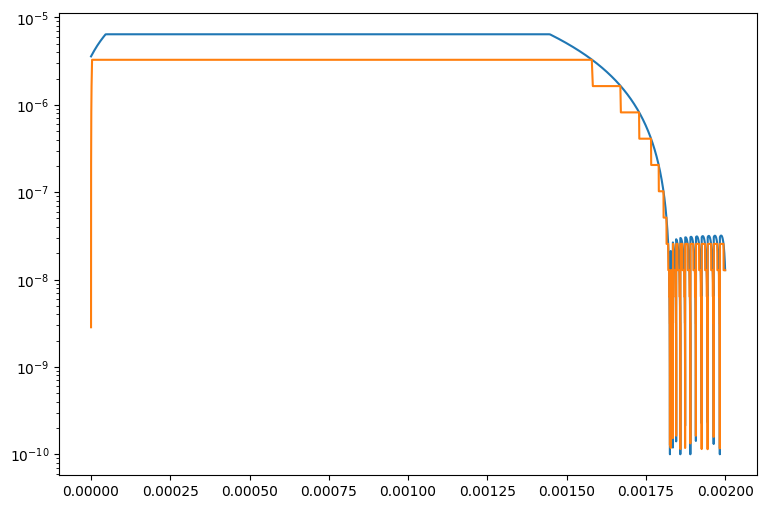

In [21]:
plt.figure(figsize=(9, 6))
plt.yscale('log')
plt.plot(model_ad_phi.ts, model_ad_phi._dt_adaptive_phi)
plt.plot(model_ad_phi.ts[:-1], (model_ad_phi.ts[1:] - model_ad_phi.ts[:-1]) / model_ad_phi._t_iterations[1:])
plt.show()

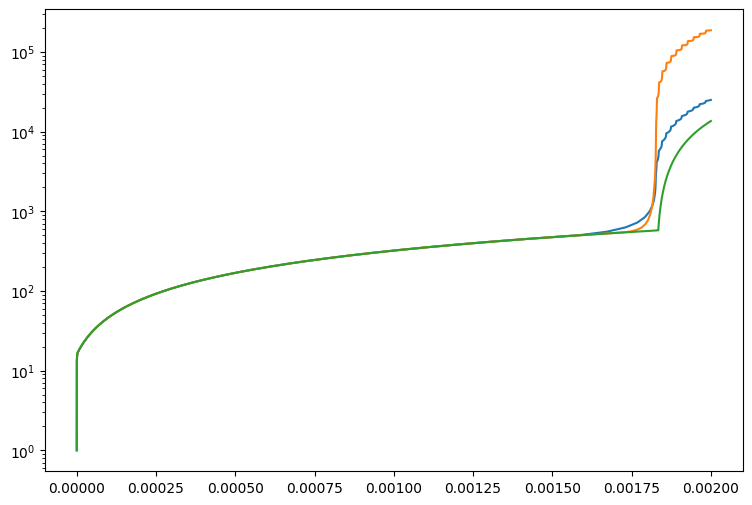

In [22]:
plt.figure(figsize=(9, 6))
plt.yscale('log')
plt.plot(model_ad_phi.ts, model_ad_phi._t_iterations.cumsum())
plt.plot(model_ad_energy.ts, model_ad_energy._t_iterations.cumsum())
plt.plot(model_ad_stability.ts, model_ad_stability._t_iterations.cumsum())
plt.show()

## Сравнения по норме

In [23]:
diff_ad_phi, ts_ad_phi_ = phi_difference(model, model_ad_phi)
diff_ad_energy, ts_ad_energy_ = phi_difference(model, model_ad_energy)
diff_ad_stability, ts_ad_stability_ = phi_difference(model, model_ad_stability)

In [77]:
print(norm_uniform(diff_ad_phi))
print(norm_uniform(diff_ad_energy))
print(norm_uniform(diff_ad_stability))

0.649912595375
0.68344340675
0.771194224717


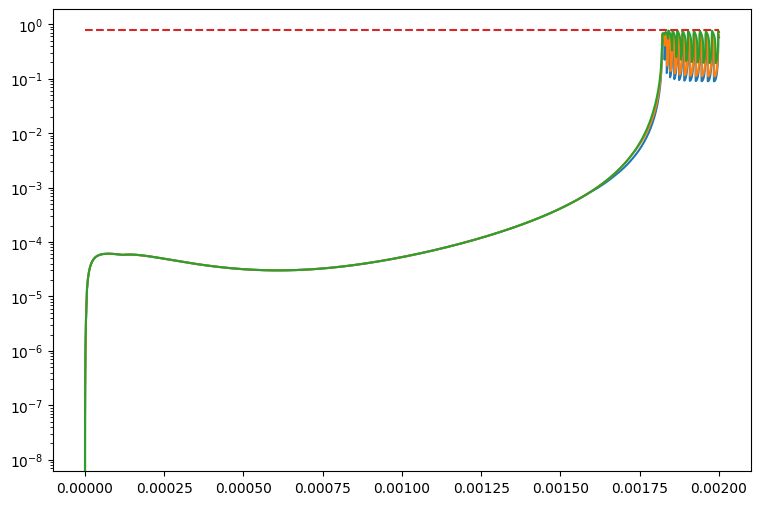

In [24]:
plt.figure(figsize=(9, 6))
plt.yscale('log')
plt.plot(ts_ad_phi_, np.abs(diff_ad_phi).max(axis = 1))
plt.plot(ts_ad_energy_, np.abs(diff_ad_energy).max(axis = 1))
plt.plot(ts_ad_stability_, np.abs(diff_ad_stability).max(axis = 1))
plt.plot([0, 2e-3], [norm_uniform(diff_ad_stability), norm_uniform(diff_ad_stability)], '--')
plt.show()

Рост отклонения близок к экспоненциальному. Это в духе неустойчивого равновесия.

In [25]:
metric_ad_phi, t_shift_ad_phi = \
    metric_shifted(model_ad_phi.df_phi, model_ad_phi.ts, model.df_phi, model.ts)

In [26]:
metric_ad_energy, t_shift_ad_energy = \
    metric_shifted(model_ad_energy.df_phi, model_ad_energy.ts, model.df_phi, model.ts)

In [27]:
metric_ad_stability, t_shift_ad_stability = \
    metric_shifted(model_ad_stability.df_phi, model_ad_stability.ts, model.df_phi, model.ts,)

In [28]:
def window_min(values, k):
    if k == 0:
        return values
    return np.array([values[i - k:i + k].min() for i in range(k, len(values) - k)])

def window_max(values, k):
    if k == 0:
        return values
    return np.array([values[i - k:i + k].max() for i in range(k, len(values) - k)])

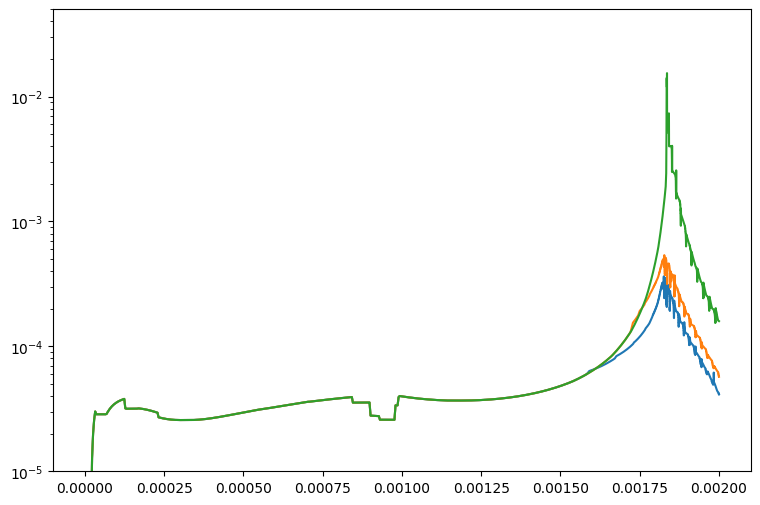

In [29]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-5, 5e-2])
plt.yscale('log')
k = 5
plt.plot(model_ad_phi.ts[k:-k], window_min(metric_ad_phi, k))
plt.plot(model_ad_energy.ts[k:-k], window_min(metric_ad_energy, k))
plt.plot(model_ad_stability.ts[k:-k], window_min(metric_ad_stability, k))
plt.show()

Формально запаздывание отрицательно, но это из-за перестановки моделей в функции. Модели с адаптацией отстают по времени.

In [30]:
k = 5
print(window_min(metric_ad_phi, k).max())
print(window_min(metric_ad_energy, k).max())
print(window_min(metric_ad_stability, k).max())

0.0003636622691679525
0.0005376114413038202
0.01540621748205484


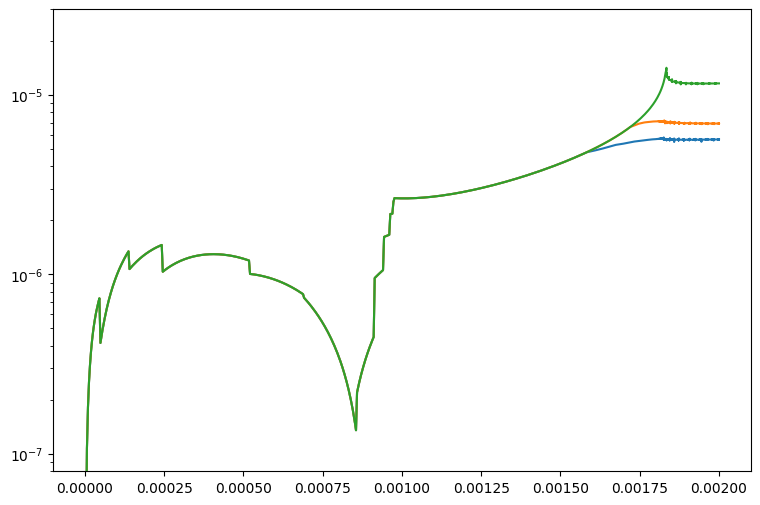

In [31]:
plt.figure(figsize=(9, 6))
plt.ylim([8e-8, 3e-5])
plt.yscale('log')
plt.plot(model_ad_phi.ts, np.abs(t_shift_ad_phi))
plt.plot(model_ad_energy.ts, np.abs(t_shift_ad_energy))
plt.plot(model_ad_stability.ts, np.abs(t_shift_ad_stability))
plt.show()

In [32]:
print(np.abs(t_shift_ad_phi).max())
print(np.abs(t_shift_ad_energy).max())
print(np.abs(t_shift_ad_stability).max())

5.794909221600836e-06
7.2115298069464384e-06
1.4166641142901932e-05


## Увеличение точности

In [33]:
model_ad_phi_tol = model_from_file(models_dir + 'model_ad_phi_tol.csv')

In [34]:
metric_ad_phi_tol, t_shift_ad_phi_tol = \
    metric_shifted(model_ad_phi_tol.df_phi, model_ad_phi_tol.ts, model.df_phi, model.ts)

In [35]:
model_ad_phi_max = model_from_file(models_dir + 'model_ad_phi_max.csv')

In [36]:
metric_ad_phi_max, t_shift_ad_phi_max = \
    metric_shifted(model_ad_phi_max.df_phi, model_ad_phi_max.ts, model.df_phi, model.ts)

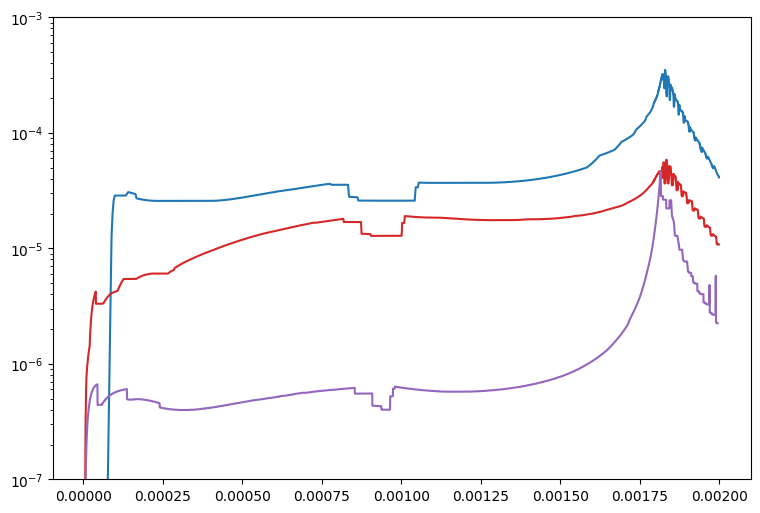

In [37]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-7, 1e-3])
plt.yscale('log')
k = 25
plt.plot(model_ad_phi.ts[k:-k], window_min(metric_ad_phi, k), color='C0')
plt.plot(model_ad_phi_tol.ts[k:-k], window_min(metric_ad_phi_tol, k), color='C3')
plt.plot(model_ad_phi_max.ts[k:-k], window_min(metric_ad_phi_max, k), color='C4')
plt.show()

In [38]:
k = 25
print(window_min(metric_ad_phi, k).max())
print(window_min(metric_ad_phi_tol, k).max())
print(window_min(metric_ad_phi_max, k).max())

0.0003503993444414766
5.845961804995525e-05
4.61668174155383e-05


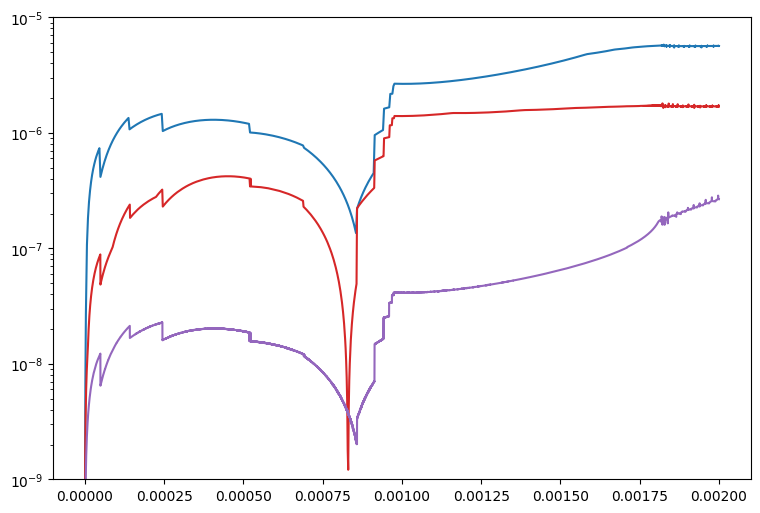

In [39]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-9, 1e-5])
plt.yscale('log')
plt.plot(model_ad_phi.ts, np.abs(t_shift_ad_phi), color='C0')
plt.plot(model_ad_phi_tol.ts, np.abs(t_shift_ad_phi_tol), color='C3')
plt.plot(model_ad_phi_max.ts, np.abs(t_shift_ad_phi_max), color='C4')
plt.show()

In [40]:
print(np.abs(t_shift_ad_phi).max())
print(np.abs(t_shift_ad_phi_tol).max())
print(np.abs(t_shift_ad_phi_max).max())

5.794909221600836e-06
1.7969165126948104e-06
2.8567205581750075e-07


In [41]:
model_ad_energy_tol = model_from_file(models_dir + 'model_ad_energy_tol.csv')

In [42]:
metric_ad_energy_tol, t_shift_ad_energy_tol = \
    metric_shifted(model_ad_energy_tol.df_phi, model_ad_energy_tol.ts, model.df_phi, model.ts)

In [43]:
model_ad_energy_max = model_from_file(models_dir + 'model_ad_energy_max.csv')

In [44]:
metric_ad_energy_max, t_shift_ad_energy_max = \
    metric_shifted(model_ad_energy_max.df_phi, model_ad_energy_max.ts, model.df_phi, model.ts)

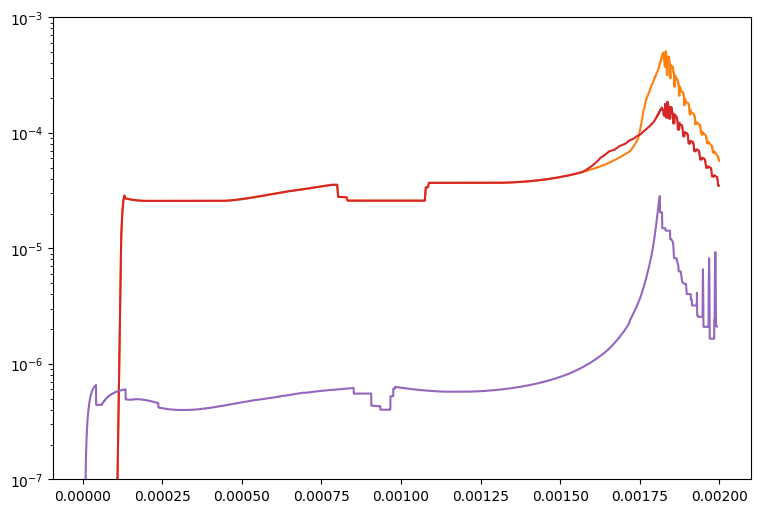

In [45]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-7, 1e-3])
plt.yscale('log')
k = 35
plt.plot(model_ad_energy.ts[k:-k], window_min(metric_ad_energy, k), color='C1')
plt.plot(model_ad_energy_tol.ts[k:-k], window_min(metric_ad_energy_tol, k), color='C3')
plt.plot(model_ad_energy_max.ts[k:-k], window_min(metric_ad_energy_max, k), color='C4')
plt.show()

In [46]:
k = 35
print(window_min(metric_ad_energy, k).max())
print(window_min(metric_ad_energy_tol, k).max())
print(window_min(metric_ad_energy_max, k).max())

0.0005077186910473763
0.00018604325560178658
2.8275745256656215e-05


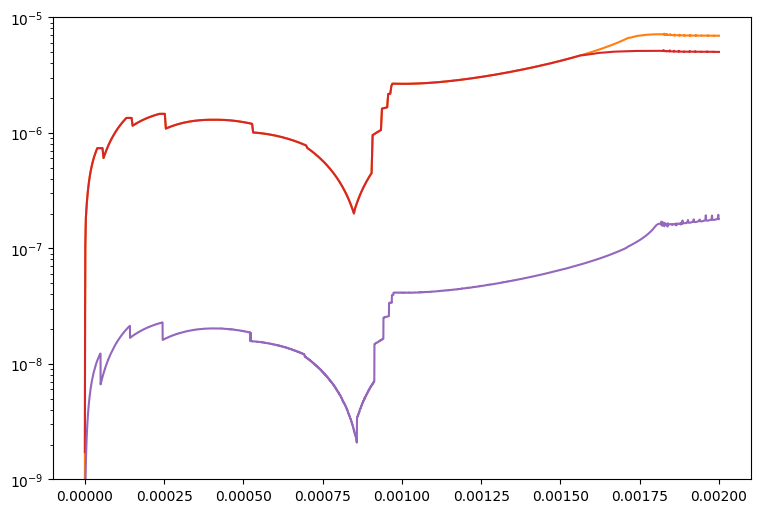

In [47]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-9, 1e-5])
plt.yscale('log')
k = 3
plt.plot(model_ad_energy.ts[k:-k], window_max(np.abs(t_shift_ad_energy), k), color='C1')
plt.plot(model_ad_energy_tol.ts[k:-k], window_max(np.abs(t_shift_ad_energy_tol), k), color='C3')
plt.plot(model_ad_energy_max.ts[k:-k], window_max(np.abs(t_shift_ad_energy_max), k), color='C4')
plt.show()

In [48]:
print(np.abs(t_shift_ad_energy).max())
print(np.abs(t_shift_ad_energy_tol).max())
print(np.abs(t_shift_ad_energy_max).max())

7.2115298069464384e-06
5.195808186213763e-06
1.9472861285884513e-07


In [49]:
model_ad_stability_tol = model_from_file(models_dir + 'model_ad_stability_tol.csv')

In [50]:
metric_ad_stability_tol, t_shift_ad_stability_tol = \
    metric_shifted(model_ad_stability_tol.df_phi, model_ad_stability_tol.ts, model.df_phi, model.ts)

In [51]:
model_ad_stability_max = model_from_file(models_dir + 'model_ad_stability_max.csv')

In [52]:
metric_ad_stability_max, t_shift_ad_stability_max = \
    metric_shifted(model_ad_stability_max.df_phi, model_ad_stability_max.ts, model.df_phi, model.ts)

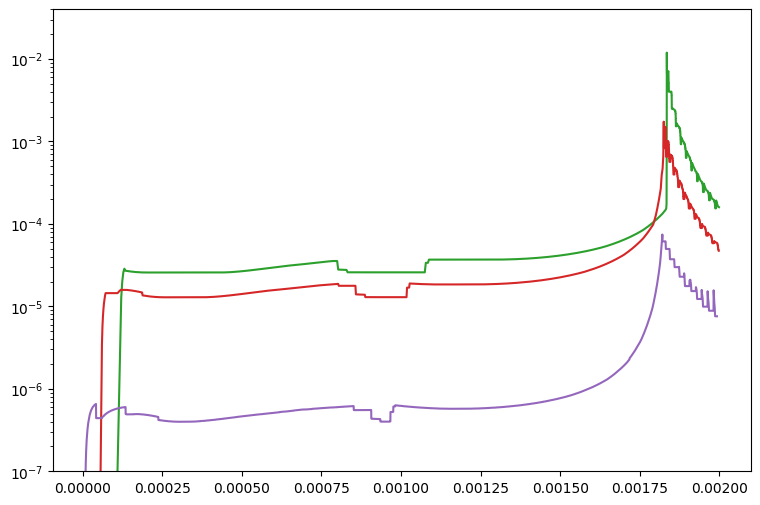

In [53]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-7, 4e-2])
plt.yscale('log')
k = 35
plt.plot(model_ad_stability.ts[k:-k], window_min(metric_ad_stability, k), color='C2')
plt.plot(model_ad_stability_tol.ts[k:-k], window_min(metric_ad_stability_tol, k), color='C3')
plt.plot(model_ad_stability_max.ts[k:-k], window_min(metric_ad_stability_max, k), color='C4')
plt.show()

In [54]:
k = 35
print(window_min(metric_ad_stability, k).max())
print(window_min(metric_ad_stability_tol, k).max())
print(window_min(metric_ad_stability_max, k).max())

0.011914907444058986
0.001734247348218254
7.429405304582026e-05


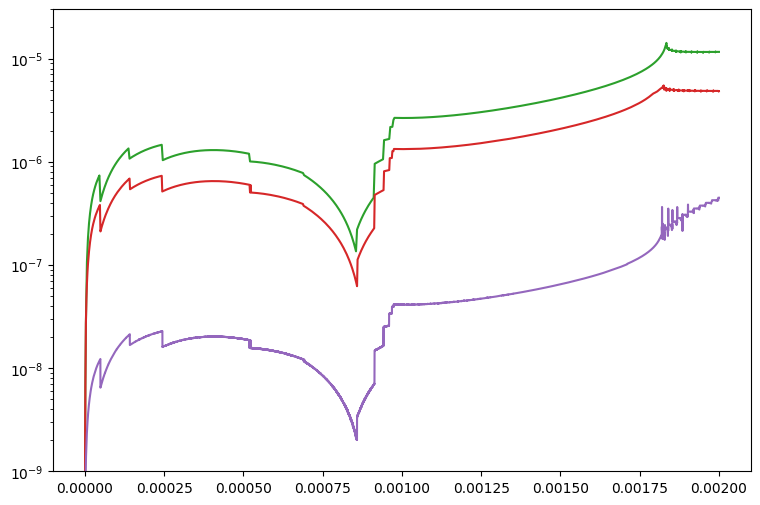

In [55]:
plt.figure(figsize=(9, 6))
plt.ylim([1e-9, 3e-5])
plt.yscale('log')
plt.plot(model_ad_stability.ts, np.abs(t_shift_ad_stability), color='C2')
plt.plot(model_ad_stability_tol.ts, np.abs(t_shift_ad_stability_tol), color='C3')
plt.plot(model_ad_stability_max.ts, np.abs(t_shift_ad_stability_max), color='C4')
plt.show()

In [56]:
print(np.abs(t_shift_ad_energy).max())
print(np.abs(t_shift_ad_energy_tol).max())
print(np.abs(t_shift_ad_energy_max).max())

7.2115298069464384e-06
5.195808186213763e-06
1.9472861285884513e-07


## Сопоставление по ускорению

In [57]:
boost(model_ad_phi_tol)

Шагов было: 19998721
Шагов стало: 226675
Ускорение ~ 88.22640785265247


In [58]:
boost(model_ad_phi_max)

Шагов было: 19998721
Шагов стало: 60597
Ускорение ~ 330.0282357212403


In [59]:
boost(model_ad_energy_tol)

Шагов было: 19998721
Шагов стало: 666560
Ускорение ~ 30.00288196111378


In [60]:
boost(model_ad_energy_max)

Шагов было: 19998721
Шагов стало: 235476
Ускорение ~ 84.92891419932393


In [61]:
boost(model_ad_stability_tol)

Шагов было: 19998721
Шагов стало: 112454
Ускорение ~ 177.83912533124655


In [62]:
boost(model_ad_stability_max)

Шагов было: 19998721
Шагов стало: 49619
Ускорение ~ 403.04562768294403


In [63]:
model_ad_phi_100 = model_from_file(models_dir + 'model_ad_phi_100.csv')

In [64]:
model_ad_energy_100 = model_from_file(models_dir + 'model_ad_energy_100.csv')

In [65]:
model_ad_stability_100 = model_from_file(models_dir + 'model_ad_stability_100.csv')

In [66]:
boost(model_ad_phi_100)

Шагов было: 19998721
Шагов стало: 198900
Ускорение ~ 100.54661136249372


In [67]:
boost(model_ad_energy_100)

Шагов было: 19998721
Шагов стало: 197292
Ускорение ~ 101.36610202136934


In [68]:
boost(model_ad_stability_100)

Шагов было: 19998721
Шагов стало: 199757
Ускорение ~ 100.11524502270258


In [78]:
diff_ad_phi_100, ts_ad_phi_100_ = phi_difference(model, model_ad_phi_100)
diff_ad_energy_100, ts_ad_energy_100_ = phi_difference(model, model_ad_energy_100)
diff_ad_stability_100, ts_ad_stability_100_ = phi_difference(model, model_ad_stability_100)

In [79]:
print(norm_uniform(diff_ad_phi_100))
print(norm_uniform(diff_ad_energy_100))
print(norm_uniform(diff_ad_stability_100))

0.21381069837500002
0.595424532375
0.237627070139


In [69]:
metric_ad_phi_100, t_shift_ad_phi_100 = \
    metric_shifted(model_ad_phi_100.df_phi, model_ad_phi_100.ts, model.df_phi, model.ts)

In [70]:
metric_ad_energy_100, t_shift_ad_energy_100 = \
    metric_shifted(model_ad_energy_100.df_phi, model_ad_energy_100.ts, model.df_phi, model.ts)

In [71]:
metric_ad_stability_100, t_shift_ad_stability_100 = \
    metric_shifted(model_ad_stability_100.df_phi, model_ad_stability_100.ts, model.df_phi, model.ts)

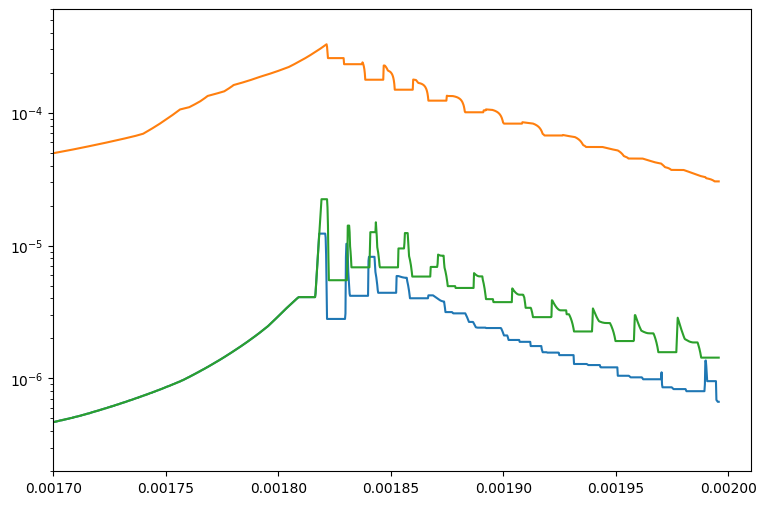

In [72]:
plt.figure(figsize=(9, 6))
plt.xlim([1.7e-3, 2.01e-3])
plt.ylim([2e-7, 6e-4])
plt.yscale('log')
k = 20
plt.plot(model_ad_phi_100.ts[k:-k], window_min(metric_ad_phi_100, k))
plt.plot(model_ad_energy_100.ts[k:-k], window_min(metric_ad_energy_100, k))
plt.plot(model_ad_stability_100.ts[k:-k], window_min(metric_ad_stability_100, k))
plt.show()

In [73]:
print(window_min(metric_ad_phi_100, k).max())
print(window_min(metric_ad_energy_100, k).max())
print(window_min(metric_ad_stability_100, k).max())

1.2294527106271325e-05
0.0003271942093702185
2.2317379855807395e-05


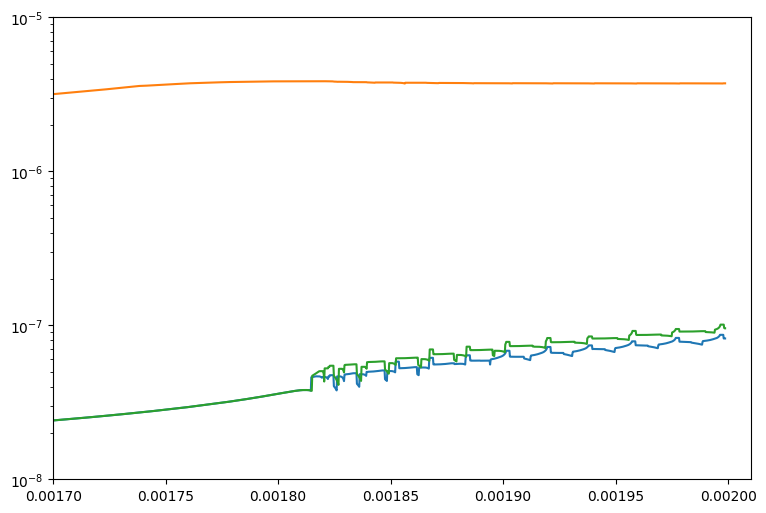

In [74]:
plt.figure(figsize=(9, 6))
plt.xlim([1.7e-3, 2.01e-3])
plt.ylim([1e-8, 1e-5])
plt.yscale('log')
k = 2
plt.plot(
    model_ad_phi_100.ts[3*k:-3*k],
    window_max(window_min(np.abs(t_shift_ad_phi_100), k), 2*k)
)
plt.plot(
    model_ad_energy_100.ts[3*k:-3*k],
    window_max(window_min(np.abs(t_shift_ad_energy_100), k), 2*k)
)
plt.plot(
    model_ad_stability_100.ts[3*k:-3*k],
    window_max(window_min(np.abs(t_shift_ad_stability_100), k), 2*k)
)
plt.show()

In [75]:
print(window_max(window_min(np.abs(t_shift_ad_phi_100), k), 2*k).max())
print(window_max(window_min(np.abs(t_shift_ad_energy_100), k), 2*k).max())
print(window_max(window_min(np.abs(t_shift_ad_stability_100), k), 2*k).max())

8.669259567671042e-08
3.843084157307177e-06
1.0098270866208042e-07
